<a href="https://colab.research.google.com/github/djsmacker01/Data-Scientist-Projects/blob/main/Nurudeen_Adedeji_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
train = files.upload()


In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
# data = pd.read_csv(io.BytesIO(train['train.csv']))
df= pd.read_csv("/")

NameError: name 'pd' is not defined

In [ ]:
#list out all the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
missing_val = df.isnull().sum()
missing_val

In [ ]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(20))

In [ ]:
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [ ]:
#Separate numercial and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#imputer for numerical data (using Median)
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [ ]:
#imputer for categorical data (using most frequent value)
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [ ]:
#verify there are no more missing values
missing_val = df.isnull().sum()
missing_val

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [ ]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(60))

Columns with the most missing values:
Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
TotalBsmtSF      0
Utilities   

In [ ]:
num_cols = len(categorical_cols)
print(num_cols)

39


In [ ]:
num_rows = (num_cols + 2) // 3
print(num_rows)

13


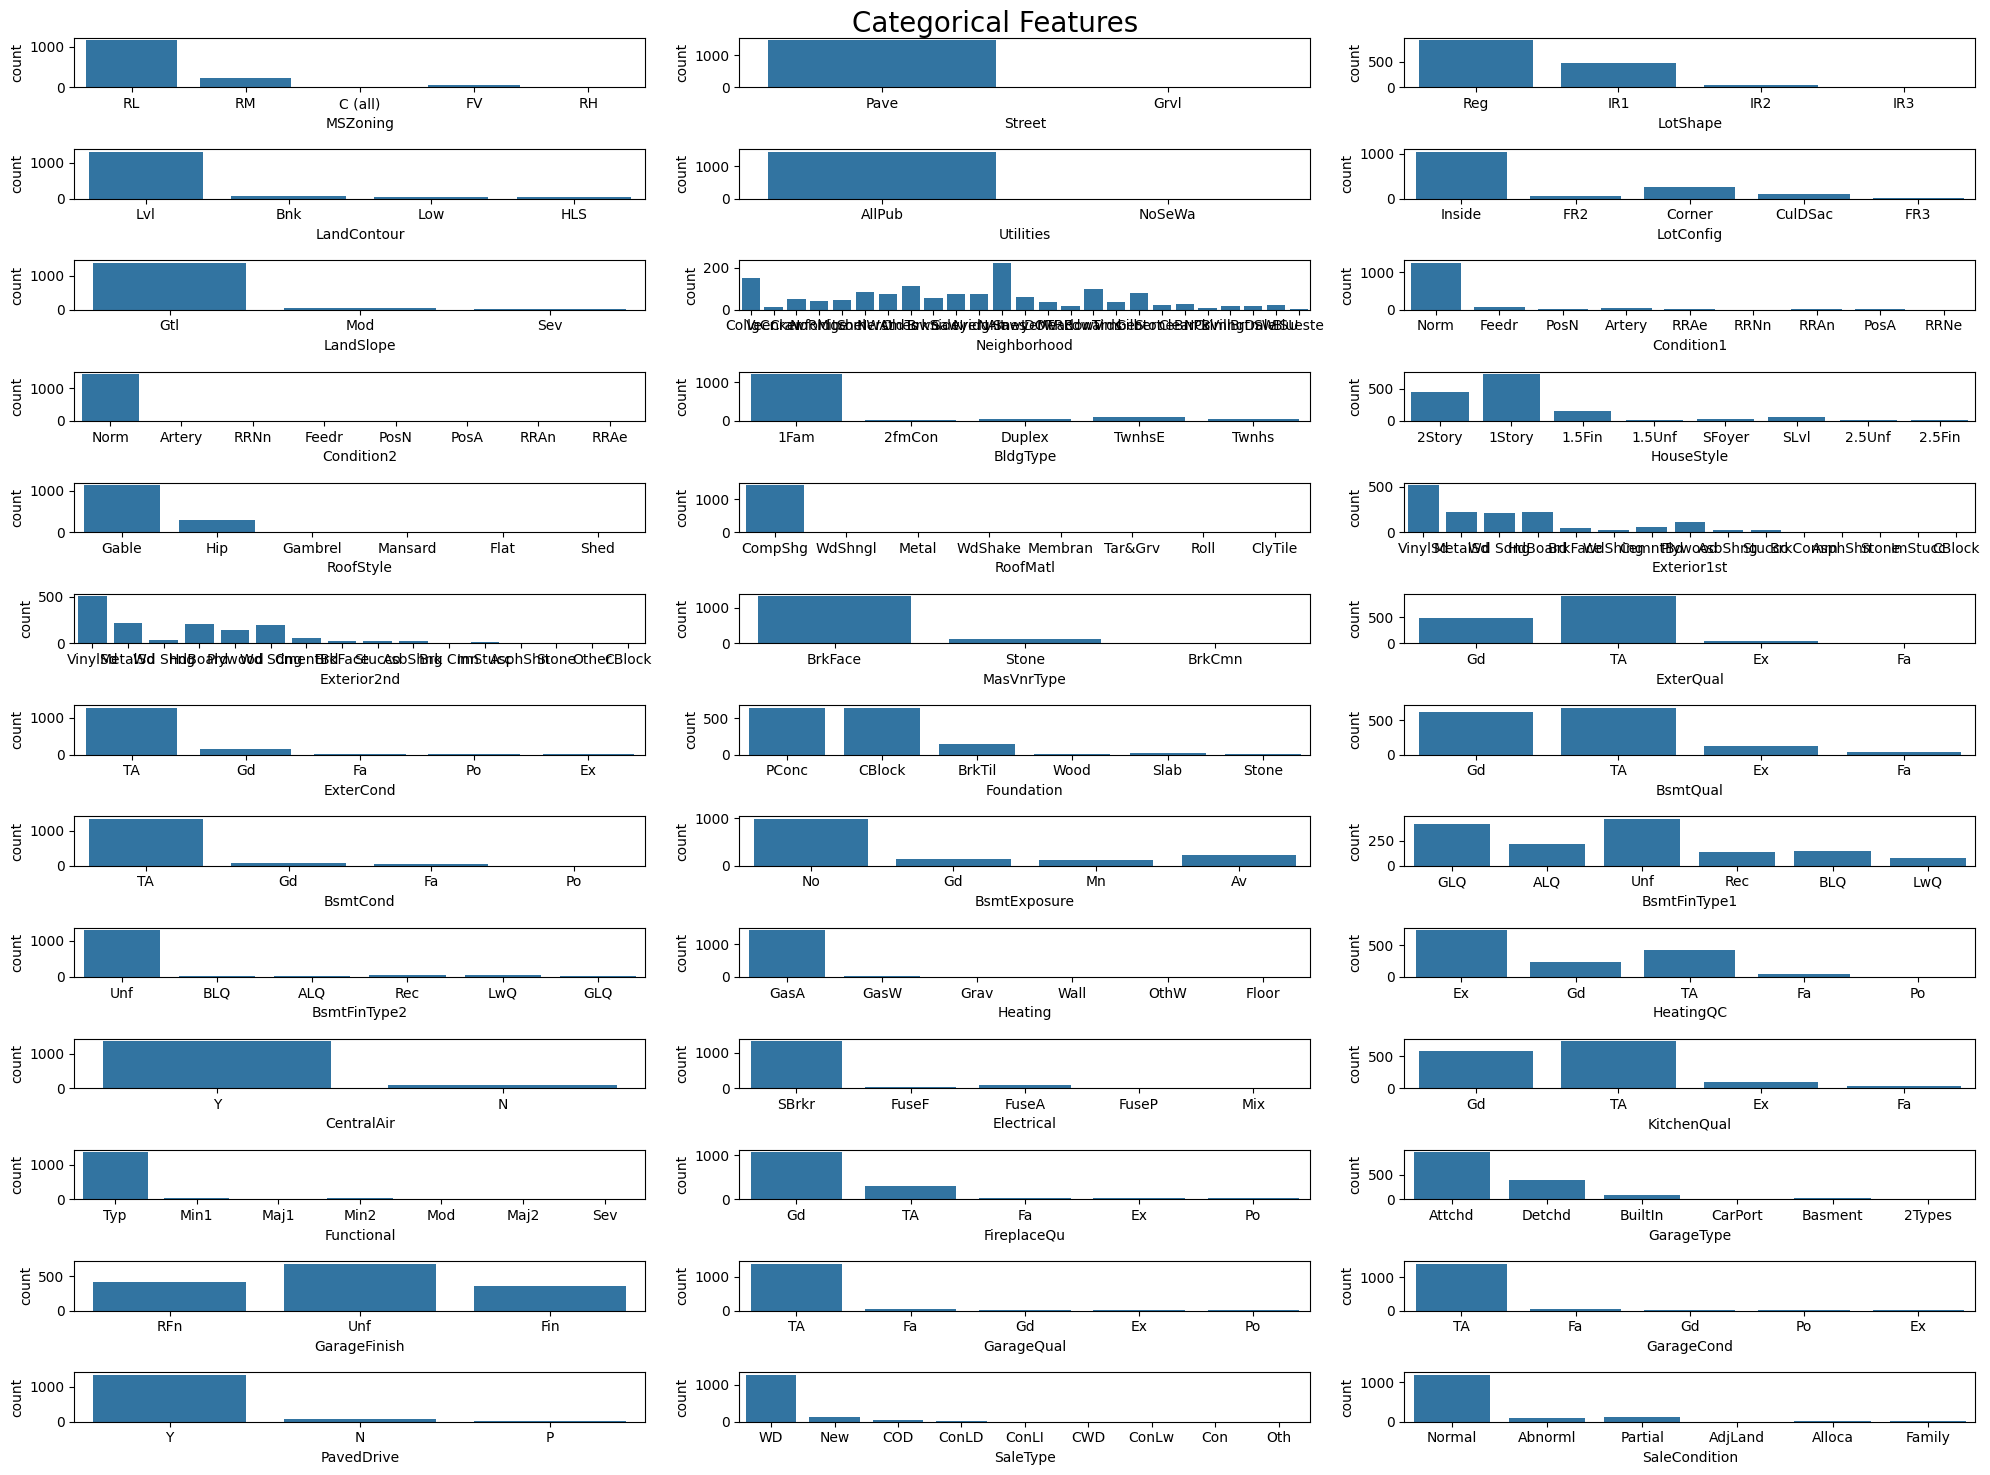

In [ ]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all categorical

num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
plt.figure(figsize=(20,15))
plt.suptitle('Categorical Features', fontsize=20)
for i in range(0, len(categorical_cols)):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=categorical_cols[i], data=df)
    plt.tight_layout()

<ipython-input-26-12bcc88cb698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-26-12bcc88cb698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-26-12bcc88cb698>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

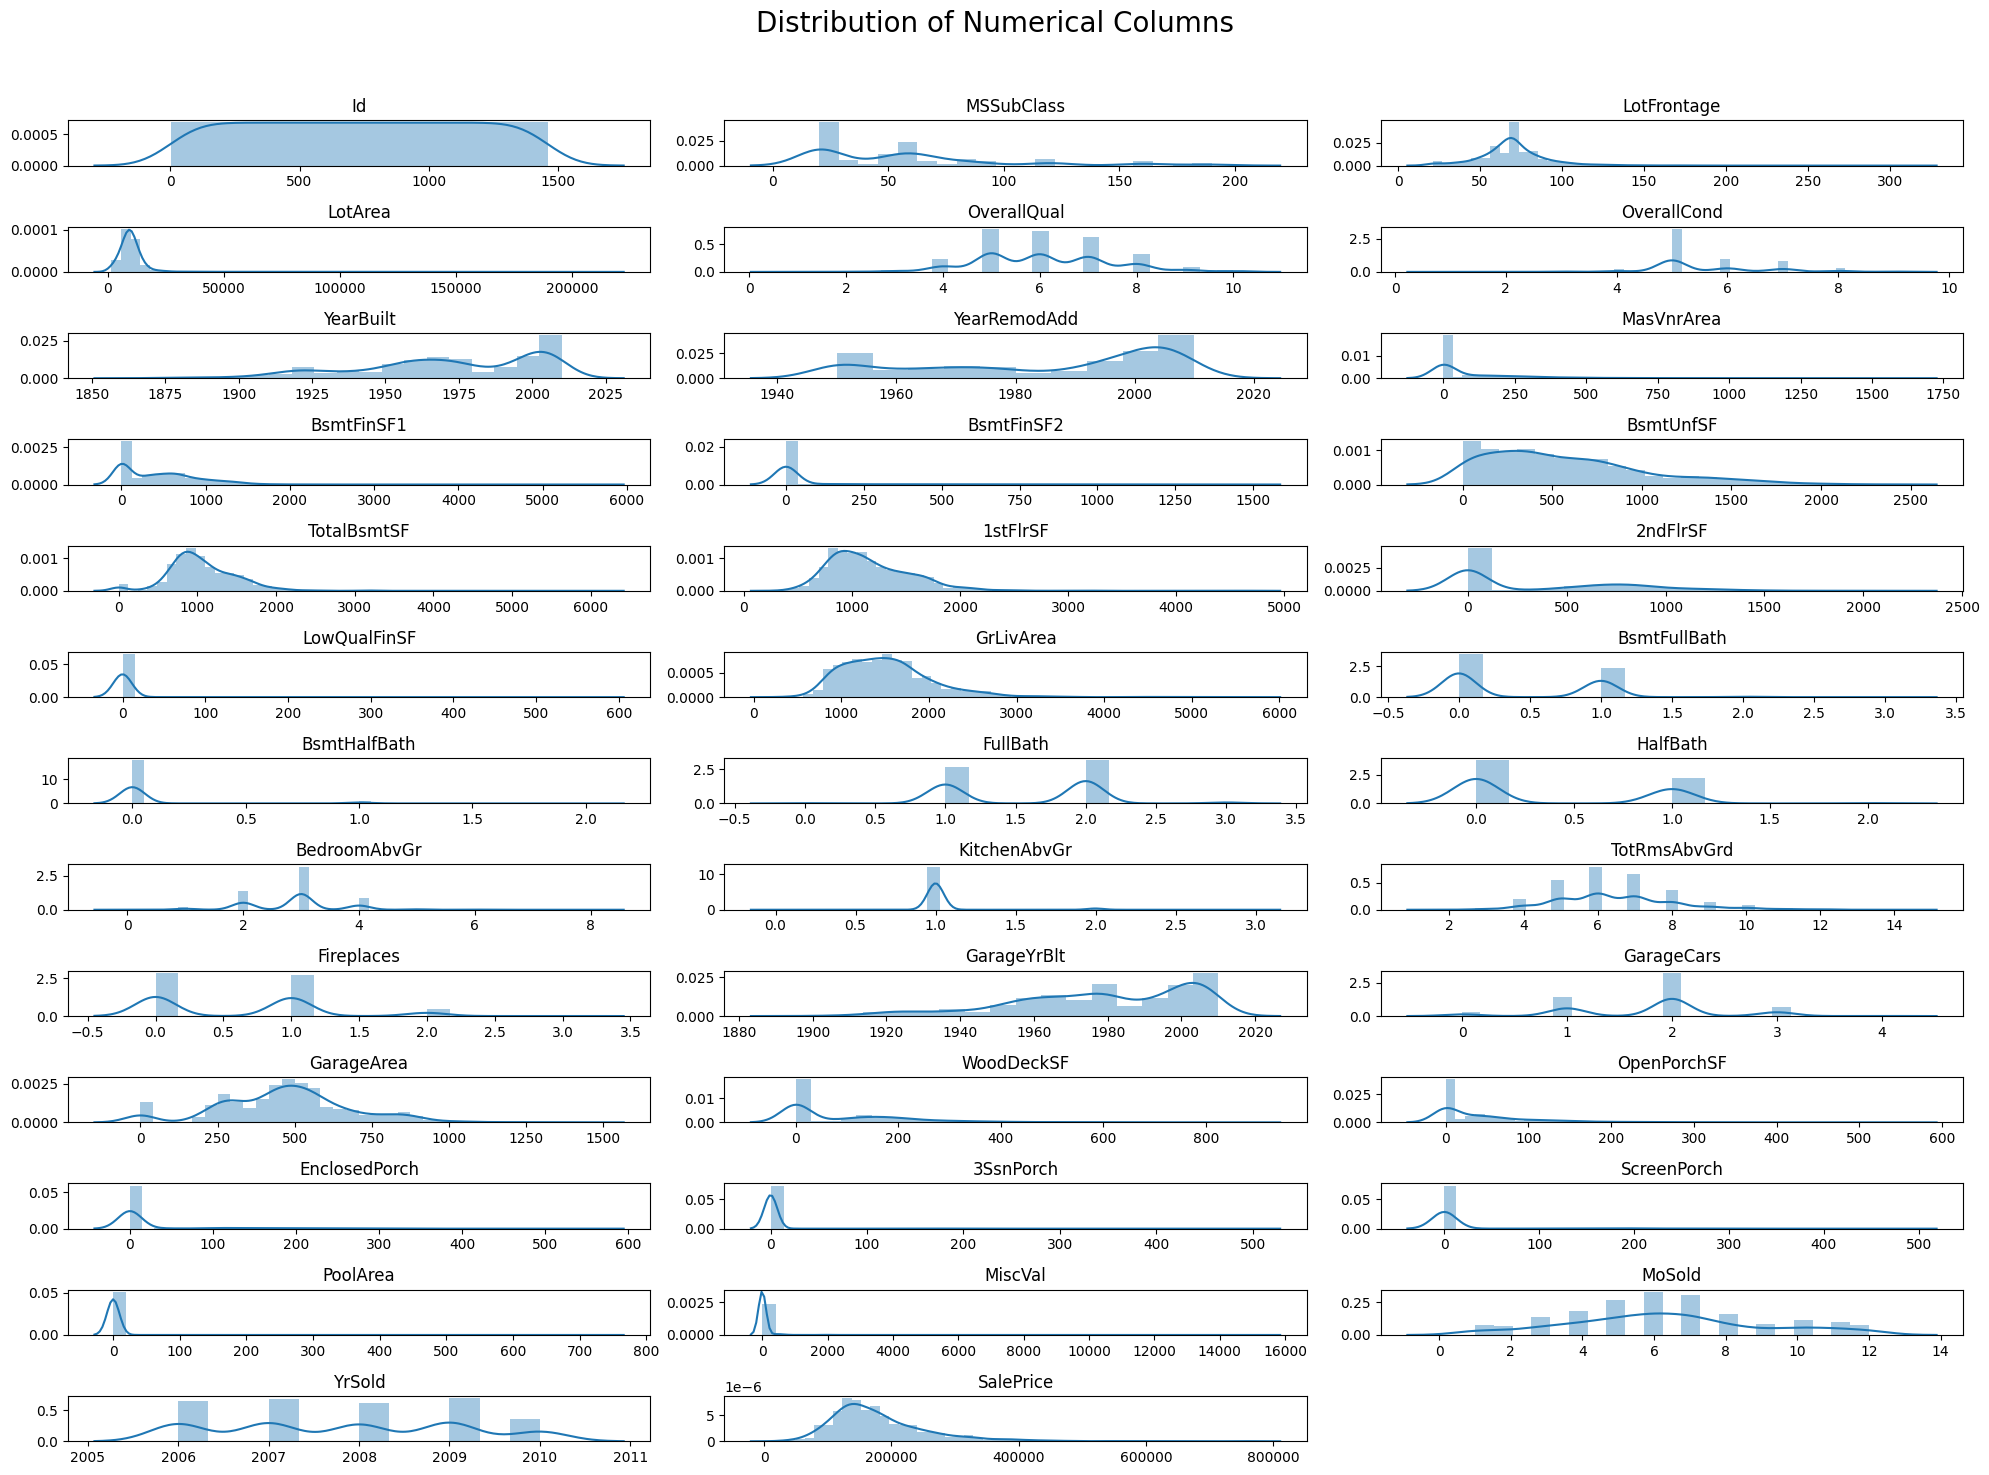

In [ ]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all numerical
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of Numerical Columns', fontsize=20)

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
  sns.distplot(df[col])
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('')

plt.tight_layout(rect=[0,0,1, 0.96])
plt.show()

In [ ]:
# total square footage of house (including basement)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# total number of bathrooms (which includes full and half)
df['TotalBath'] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])

#Age of the house at the time of sale
df['House'] = df["YrSold"] - df["YearBuilt"]

# Number of years since the house was remodeled
df['YearSinceRemodeled'] = df["YrSold"] - df["YearRemodAdd"]

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df["YearSinceRemodeled"].head()

0     5
1    31
2     6
3    36
4     8
Name: YearSinceRemodeled, dtype: int64

# Encode categorical features using one-hot encoding or label encoding

Handle Outliers
> Identify and hanle outliers in numerical features

Perform Feature scaling
> Do this by Standardizing or Normalizing

Feature Selection
> Select features that are most relevant for the prediction

Train model

Evaluate the model

**NLP**

Various Branches in NLP
1. Text Classification
2. Sentiment Analysis
3. Named Entity Reconition
4. Part-of-Speech (POS) tagging
5. Machine Translation
6. Text Generation
7. Question-Answering
8. Language Modeling
9. Information Retrieval
10. Speech Reconition and Synthesis
11. Text Summarization

**Text Processing**
It is the cleaning and prepating of text data for Analysis

Various was to perform text processing.
1. Tokenization: Splitting texts into indivial words or tokens. "I am a boy and I love to play"..... "I", "am", "a", "boy" "and", "I", "love", "to", "play".

2. Lowercasing: Converts all words to lowercase to ensure uniformity.

3. Removing of Punctuation.

4. Removing of Stop words: Filtering of common words likes, "the", "is", "and" without any significant meaning.

5. Stemming and Lemmatization: It means reducing words to their base root.

Dance and Dancing (Dance)
playing, played, play. (play)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = "Natural Language Processing is an exciting field of study"

**Tokenization**

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
print(tokens)

['Natural', 'Language', 'Processing', 'is', 'an', 'exciting', 'field', 'of', 'study']


**Lowercasing**

In [ ]:
tokens = [token.lower() for token in tokens]
print(tokens)

['natural', 'language', 'processing', 'is', 'an', 'exciting', 'field', 'of', 'study']


**Removing Stop Words**

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]
print(filtered_tokens)

['natural', 'language', 'processing', 'exciting', 'field', 'study']


**Stemming**

In [ ]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(stemmed_tokens)

['natur', 'languag', 'process', 'excit', 'field', 'studi']


**Text Classification**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [ ]:
newsgroup = fetch_20newsgroups(subset='train')
X_train, X_test, y_train, y_test = train_test_split(newsgroup.data, newsgroup.target, test_size=0.2, random_state=42)

In [ ]:
X_train

["From: Rupin.Dang@dartmouth.edu (Rupin Dang)\nSubject: Nikon FM2 and lens forsale\nOrganization: Dartmouth College, Hanover, NH\nLines: 5\n\nNikon FM-2n with 50 mm Nikkor and accessories for sale.I bought this camera in\nHong Kong two years ago and everything has been looked after very well. I'm now\nselling some more gear to finance my next big film project.\n\nAsking $350 for package. NO BARGAINS.\n",
 'From: simon@giaeb.cc.monash.edu.au\nSubject: St. Maria Goretti\nOrganization: Monash University, Melb., Australia.\nLines: 125\n\nHeres the life of St. MAria Goretti, posted with kind permission of\nthe editor of the Australian Catholic Magazine "Morning Star".\n\nHope you like it.\n\n    Put up with anything to prevent sin St. Maria Goretti\n\n\n\n    Maria was born on October 16th 1890 to Luigi and Assunta Goretti,\n    the  eldest  daughter  in the family of seven. She was a cheerful\n    girl, always imitating her parents.  She had but one disire,  but\n    one wish: to receive o

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_train

array([ 6, 15, 15, ...,  0, 17, 10])

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted

array([ 3,  2,  6, ..., 14, 16, 11])

In [ ]:
print("Classification Report:\n", metrics.classification_report(y_test, predicted))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        97
           1       0.85      0.81      0.83       104
           2       0.91      0.75      0.82       115
           3       0.66      0.80      0.72       123
           4       0.96      0.79      0.86       126
           5       0.89      0.90      0.89       106
           6       0.89      0.73      0.80       109
           7       0.90      0.91      0.91       139
           8       0.93      0.93      0.93       122
           9       0.92      0.96      0.94       102
          10       0.94      0.97      0.95       108
          11       0.78      1.00      0.88       125
          12       0.90      0.79      0.84       114
          13       0.99      0.89      0.94       119
          14       0.95      0.95      0.95       127
          15       0.49      0.96      0.65       122
          16       0.87      0.96      0.91       121
   

In [ ]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predicted))

Confusion Matrix:
 [[ 74   0   0   0   0   0   0   0   0   0   0   1   0   0   0  21   0   1
    0   0]
 [  0  84   3   4   0   4   1   0   0   1   0   3   0   0   1   2   1   0
    0   0]
 [  0   5  86  15   0   4   1   0   0   1   0   2   0   0   0   1   0   0
    0   0]
 [  0   4   1  99   2   1   3   0   0   0   0   7   2   0   0   4   0   0
    0   0]
 [  0   0   2  12  99   0   1   0   1   1   1   4   2   0   1   2   0   0
    0   0]
 [  0   2   0   4   0  95   0   1   1   0   0   2   0   0   0   1   0   0
    0   0]
 [  0   0   0   9   0   1  80   4   2   0   1   3   3   1   1   4   0   0
    0   0]
 [  0   0   0   0   0   0   2 127   3   1   0   0   2   0   0   4   0   0
    0   0]
 [  0   0   0   1   0   0   0   5 114   0   0   0   0   0   1   1   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   0  98   1   0   1   0   0   1   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   1 105   1   0   0   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 

**Artificial Neural Networks**
1. Basics of Neural Networks:
> Neurons: It is the basic unit of a neural network, analogous to biologial neurons. They receive input, apply a weight, add a bias, and pass it through an activation.

> Layers: Neural Networks are composed of layers of neurons:
1. Input layer: Takes in the raw data.
2. Hidden layer: Intermediate layers that transform inout data through weights and activation function.
3. Output layer: Produces the final output.


> Activation function:
Examples of activation function:
1. Sigmoid.
2. ReLU
3. Tanh
>> Check for the formula of each above

> Forward Propagation: Data is passed through the network from input to output, applying weights, biases, and activation functions.

> Loss Function: Measures the difference between the predicted output and the actual output. Common loss functions include "Mean Squared Error (MSE) and Cross-Entropy Loss.

> Backpropagation: The process of adjusting weights and biases based on the loss function to minimize error. This involves calculating gradients and using optimization algorithms like Gradient Descent.

> Optimization Algorithms:
1. Gradient Descent: Which updates weights to minimize the loss function.

2. Variants: Stochastic Gradient Descent (SDG), Adam, RMSprop, etc.

In [ ]:
import numpy as np

#Activation Functions
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.random.uniform(-1, 1, (1, output_size))

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        # Backpropagate
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - self.output))
                print(f'Epoch {epoch}, Loss: {loss}')


In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 4
output_size = 1
epochs = 100000
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, y, epochs, learning_rate)

print("Predictions:")
print(nn.forward(X))

Epoch 0, Loss: 0.3010668732681465
Epoch 1000, Loss: 0.2501215841015868
Epoch 2000, Loss: 0.2497760200001415
Epoch 3000, Loss: 0.24917142560875313
Epoch 4000, Loss: 0.24501558904148182
Epoch 5000, Loss: 0.1632341348385602
Epoch 6000, Loss: 0.030916438658890537
Epoch 7000, Loss: 0.01195380115978388
Epoch 8000, Loss: 0.006899926594391588
Epoch 9000, Loss: 0.0047327750174340245
Epoch 10000, Loss: 0.0035608575462680106
Epoch 11000, Loss: 0.0028361929415301836
Epoch 12000, Loss: 0.0023474331565210334
Epoch 13000, Loss: 0.0019971627645888413
Epoch 14000, Loss: 0.0017346637299955367
Epoch 15000, Loss: 0.0015310826909210695
Epoch 16000, Loss: 0.0013688596621102744
Epoch 17000, Loss: 0.0012367253119276158
Epoch 18000, Loss: 0.0011271307918734054
Epoch 19000, Loss: 0.0010348376294443892
Epoch 20000, Loss: 0.0009561013205958114
Epoch 21000, Loss: 0.0008881769534462929
Epoch 22000, Loss: 0.0008290082301545075
Epoch 23000, Loss: 0.0007770253576983065
Epoch 24000, Loss: 0.0007310099168793191
Epoch 25

Coding Transformer fro scratch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math


In [ ]:
class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)

        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )

        out = self.fc_out(out)
        return out


Then define the TransformerBlock

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)

        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )

        self.dropout = nn.Dropout(dropout)

    def forward(self, value, key, query, mask):
        attention = self.attention(value, key, query, mask)

        x = self.dropout(self.norm1(attention + query))
        forward = self.feed_forward(x)
        out = self.dropout(self.norm2(forward + x))
        return out


Positional Encoding

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_length):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_length, embed_size)
        for pos in range(max_length):
            for i in range(0, embed_size, 2):
                pe[pos, i] = math.sin(pos / (10000 ** (i / embed_size)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** (i / embed_size)))

        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]


In [ ]:
#Define the transformer
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, trg_vocab_size, src_pad_idx, trg_pad_idx, embed_size=256, num_layers=6, forward_expansion=4, heads=8, dropout=0, max_length=100):
        super(Transformer, self).__init__()

        self.src_word_embedding = nn.Embedding(src_vocab_size, embed_size)
        self.src_position_embedding = PositionalEncoding(embed_size, max_length)

        self.trg_word_embedding = nn.Embedding(trg_vocab_size, embed_size)
        self.trg_position_embedding = PositionalEncoding(embed_size, max_length)

        self.layers = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size,
                    heads,
                    dropout=dropout,
                    forward_expansion=forward_expansion,
                )
                for _ in range(num_layers)
            ]
        )

        self.fc_out = nn.Linear(embed_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def make_src_mask(self, src):
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        return src_mask

    def make_trg_mask(self, trg):
        N, trg_len = trg.shape
        trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand(
            N, 1, trg_len, trg_len
        )
        return trg_mask

    def forward(self, src, trg):
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)

        src = self.dropout(
            (self.src_word_embedding(src) + self.src_position_embedding(src))
        )
        trg = self.dropout(
            (self.trg_word_embedding(trg) + self.trg_position_embedding(trg))
        )

        for layer in self.layers:
            src = layer(src, src, src, src_mask)

        out = self.fc_out(src)

        return out


**COMPUTER VISION**
Computer Vision is a broad field, and deep learning has become a major tool for tasks such as image classification, object detection, and Image Segmentation.

Branches of Computer Vision"
1. Image Classification: Identying the category of an image
2. Object Detection: Detection and location onjects within an image.
3. Image Segmentation: Partiioning an image into segments or regions.
4. Image Generation: Creating new images from learned data
5. Image Transformation: Applying transformations like rotation, scaling, or colour adjustments.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

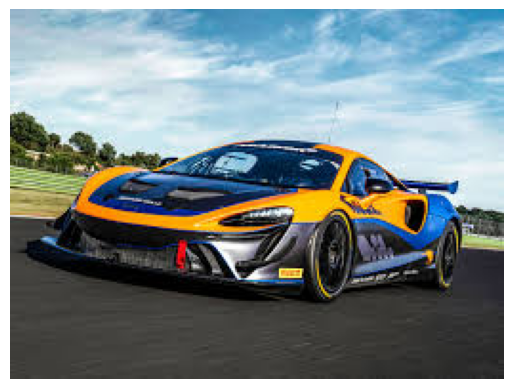

In [ ]:
image = Image.open("/content/drive/MyDrive/car.jpeg")

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
print(image.size)

(259, 194)


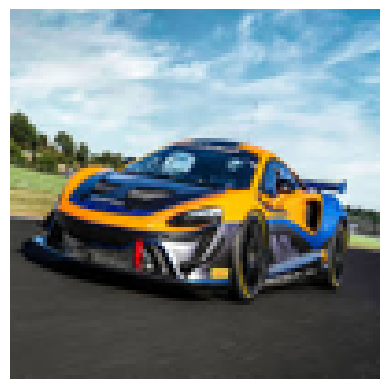

In [ ]:
#Resize Image
new_size = (100, 100)
resized_image = image.resize(new_size)

plt.imshow(resized_image)
plt.axis('off')
plt.show()

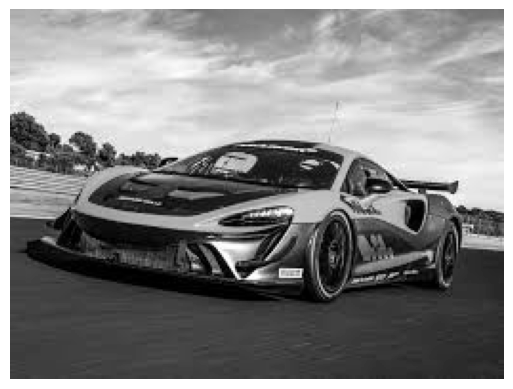

In [ ]:
#Image Conversion
#Convert between color spaces or modes

#convert to grayscale
gray_image = image.convert('L')

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

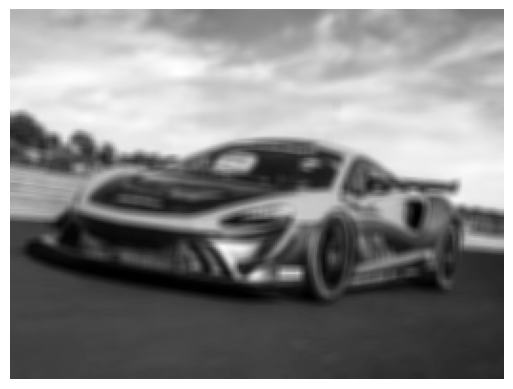

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/car.jpeg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.float32 ) / 25
blurred_image = cv2.filter2D(gray_image, -1, kernel)

plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

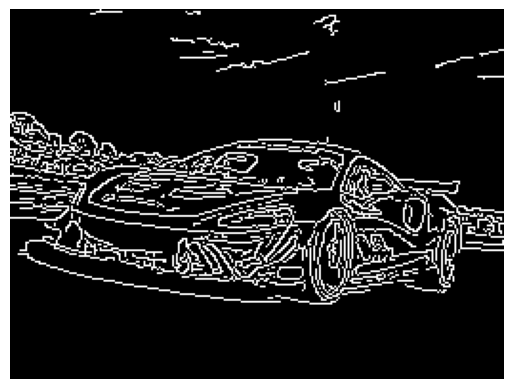

In [ ]:
#Edge Detection
edges = cv2.Canny(gray_image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

Morphological Operation: It processes imagees based on their shapes.

1. Dilation
2. Erosion
3. Closing
4. Opening

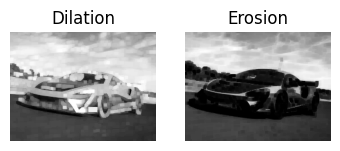

In [ ]:
kernel = np.ones((5,5), np.uint8)

#Dilation
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)

#Erosion
eroded_image = cv2.erode(gray_image, kernel, iterations=1)

plt.subplot(1,3,1)
plt.title('Dilation')
plt.imshow(dilated_image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Erosion')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()

Image Thresholding:
Thresholding converts grayscale images into binary images based on pixel intensity values

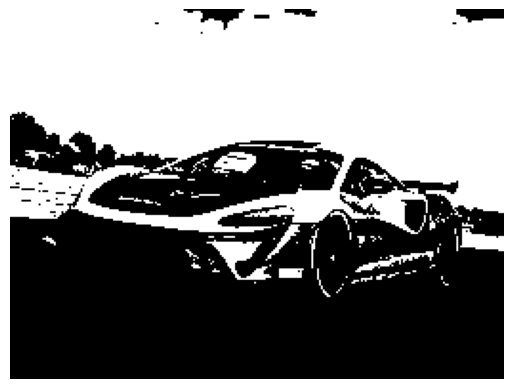

In [ ]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()


Image Segmentation:
It Segments an image into different regions.

In [ ]:
contours, _ = cv2.findContours(image.copy(), )